# Homework 03


## Part 1 - Questions

### Question 1: 
Which country consumpted the most Arabica coffee? Which country consumpted the most Robusta coffee?


* Who (population): all the countries in the data set
* What (subject, discipline): not applicable
* Where (location): all the countries in the data set
* When (snapshot, longitudinal): not applicable
* How much data do you need to do the analysis/work: the whole data set

### Question 2: 

What is Arabica consumption trend in three countries that we are interested?

* Who (population): Peru,Colombia and Costa Rica
* What (subject, discipline): Those three countries and their consumption each year
* Where (location): Peru,Colombia and Costa Rica
* When (snapshot, longitudinal): 1990-2020
* How much data do you need to do the analysis/work: 3 rows of the data set

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

This data set is collected by International Coffee Organization

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Coffee_domestic_consumption.csv
2. Link to Data: https://www.kaggle.com/datasets/michals22/coffee-dataset
3. Source / Origin: 
	* Author or Creator: Michał Sikora
	* Publication Date: 2022/12/10
	* Publisher: Kaggle
	* Version or Data Accessed: 2023/02/13
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview

* Format: csv
* Size: 24kb
* Number of Records: 55 rows



### Sample of Data




In [57]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
with open('../data/raw/Coffee_domestic_consumption.csv', 'r') as f: 
    lines = f.read()
    print(lines[:1000])


Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,1800000,1200000,1200000,1200000,1200000,900000,900000,900000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,1980000,2040000,2100000,2190000,2250000,2310000,2700000,2460000,2520000,2610000,2700000,2760000,2850000,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,762000000,792000000,815400000,825000000,85


### Fields or Column Headers

* Field/Column 1: Country, Str
* Field/Column 2: Coffee type, Str
* Field/Column 3-23: Year, int
* Field/Column 24: Total_domestic_consumption, int

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform


In [2]:
import csv

with open('../data/raw/Coffee_domestic_consumption.csv', 'r') as f: 
    next(f)
    reader = csv.reader(f)
    
    # extract three columns
    # for country that consumpts both kind of coffee, I am dropping them for the purpose of this exercise
    # I am changing the total_consumption into int

    
     # extract three columns (Note: missing values and data contain 0 are dropped during this process)
    Country = []
    Coffee_Type = []
    Total_Consumption = []
    for line in reader:
        if '0' in line:
            continue
        Country.append(line[0])
        Coffee_Type.append(line[1])
        Total_Consumption.append(line[-1])
    
    
    # transform Total_Consumption column into int
    
    Total_Consumption = [int(float(i)) for i in Total_Consumption]
    
    # store the data into numpy arrays
    import numpy as np
    Country = np.array(Country)
    Coffee_Type = np.array(Coffee_Type)
    Total_Consumption = np.array(Total_Consumption)
    
#     print(Country[0:10])
#     print(Coffee_Type[0:10])
#     print(Total_Consumption[0:10])
    
    #Fliter out Arabica consuming country and Robusta consuming country. 
    #For the purpose of this homework, I am not selecting on country that consume both
    # append the consumption of each type of coffee to the two list
    
# Create an empty list
Arabica_filter_arr = []

# go through each element in arr
for element in Coffee_Type :
  # if the element Arabica, set the value to True, otherwise False:
    if element == 'Arabica':
        Arabica_filter_arr.append(True)
    else:
        Arabica_filter_arr.append(False)

Arabica_country = Country[Arabica_filter_arr]
Arabica_consumption = Total_Consumption[Arabica_filter_arr]

print(Arabica_filter_arr)
print(Arabica_country)
print(Arabica_consumption)


[False, True, False, False, False, False, False, True, False, True, True, True, True, False, True, False, True, False, False, False, False, True, True, False, False, True, True, False, False, False, False, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False]
['Bolivia (Plurinational State of)' 'Malawi' 'Paraguay' 'Peru' 'Rwanda'
 'Zimbabwe' 'Cuba' 'Haiti' 'Colombia' 'Costa Rica' 'El Salvador'
 'Ethiopia' 'Honduras' 'Jamaica' 'Kenya' 'Nicaragua' 'Panama' 'Venezuela']
[  75180000    2340000   35100000  402000000    2139960    8595960
  384006000  600600000 2536776384  665335200  417242040 4536540000
  471850680   18688020   95190000  299700300  122916960 2386067999]


In [3]:
# Create an empty list
Robusta_filter_arr = []

# go through each element in arr
for element in Coffee_Type :
  # if the element Robusta, set the value to True, otherwise False:
    if element == 'Robusta':
        Robusta_filter_arr.append(True)
    else:
        Robusta_filter_arr.append(False)

Robusta_country = Country[Robusta_filter_arr]
Robusta_consumption = Total_Consumption[Robusta_filter_arr]

print(Robusta_filter_arr)
print(Robusta_country)
print(Robusta_consumption)


[False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, True, False, False, True, False, True, False, False, True, True, False, False, False]
['Madagascar' 'Congo' 'Central African Republic' "Côte d'Ivoire" 'Gabon'
 'Ghana' 'Guinea' 'Liberia' 'Nigeria' 'Sierra Leone' 'Togo'
 'Trinidad & Tobago']
[588705960   5360040  24794400 410260140   1123140   9970800  86730000
   8640000  70740000  10080000   2167620  21090000]


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [4]:
# TODO: Calculate on average, how much of two kinds of coffee are consumped by each country in 1990-2020
print('The mean of total consumption in each Arabica consuming country', np.mean(Arabica_consumption))
print('The mean of total consumption in each Robusta consuming country', np.mean(Robusta_consumption))

The mean of total consumption in each Arabica consuming country 725570527.9444444
The mean of total consumption in each Robusta consuming country 103305175.0


#### Dispersion

In [5]:
# TODO: calculate the std of the two kinds of coffee consumped by each country in 1990-2020
print('The standard deviation of total consumption in each Arabica consuming country is', np.std(Arabica_consumption))
print('The standard deviation of total consumption in each Robusta consuming country is', np.std(Robusta_consumption))

The standard deviation of total consumption in each Arabica consuming country is 1175280121.3862634
The standard deviation of total consumption in each Robusta consuming country is 182738595.95145267


#### Outliers


In [6]:
# TODO: calculate the min and max of two kinds of coffee consumped by each country in 1990-2020
print('The largest number of total consumption in each Arabica consuming country is', np.max(Arabica_consumption))
print('The smallest number of total consumption in each Arabica consuming country is', np.min(Arabica_consumption))
index = np.where(Arabica_consumption == np.max(Arabica_consumption))[0]
print('The largest Arabica consumption is in ', Arabica_country[index])
print('The highest  number of total consumption in each Robusta consuming country is', np.max(Robusta_consumption))
print('The lowest number of total consumption in each Robusta consuming country is', np.min(Robusta_consumption))
index = np.where(Robusta_consumption == np.max(Robusta_consumption))[0]
print('The largest Arabica consumption is in ', Robusta_country[index])

The largest number of total consumption in each Arabica consuming country is 4536540000
The smallest number of total consumption in each Arabica consuming country is 2139960
The largest Arabica consumption is in  ['Ethiopia']
The highest  number of total consumption in each Robusta consuming country is 588705960
The lowest number of total consumption in each Robusta consuming country is 1123140
The largest Arabica consumption is in  ['Madagascar']


#### Other


In [7]:
# TODO: calculate the range two kinds of coffee consumped by each country in 1990-2020
print('There are', len(Total_Consumption), 'records of data in total')

There are 48 records of data in total


###  Analysis on Categorical Data

#### Frequency

In [8]:
# TODO: How many country are consumping each kind of coffee
# Here shows all the countries as 1 becuase there is no repeated rows in our data set
unique, counts = np.unique(Country, return_counts=True)
print(np.array((unique, counts)).T)

[['Angola' '1']
 ['Bolivia (Plurinational State of)' '1']
 ['Brazil' '1']
 ['Burundi' '1']
 ['Cameroon' '1']
 ['Central African Republic' '1']
 ['Colombia' '1']
 ['Congo' '1']
 ['Costa Rica' '1']
 ['Cuba' '1']
 ["Côte d'Ivoire" '1']
 ['Democratic Republic of Congo' '1']
 ['Dominican Republic' '1']
 ['Ecuador' '1']
 ['El Salvador' '1']
 ['Ethiopia' '1']
 ['Gabon' '1']
 ['Ghana' '1']
 ['Guatemala' '1']
 ['Guinea' '1']
 ['Haiti' '1']
 ['Honduras' '1']
 ['India' '1']
 ['Indonesia' '1']
 ['Jamaica' '1']
 ['Kenya' '1']
 ['Liberia' '1']
 ['Madagascar' '1']
 ['Malawi' '1']
 ['Mexico' '1']
 ['Nicaragua' '1']
 ['Nigeria' '1']
 ['Panama' '1']
 ['Papua New Guinea' '1']
 ['Paraguay' '1']
 ['Peru' '1']
 ['Philippines' '1']
 ['Rwanda' '1']
 ['Sierra Leone' '1']
 ['Sri Lanka' '1']
 ['Tanzania' '1']
 ['Thailand' '1']
 ['Togo' '1']
 ['Trinidad & Tobago' '1']
 ['Uganda' '1']
 ['Venezuela' '1']
 ['Viet Nam' '1']
 ['Zimbabwe' '1']]


#### Unique Values

In [9]:
# show all unique values 
print(np.unique(Country, return_counts=False))

['Angola' 'Bolivia (Plurinational State of)' 'Brazil' 'Burundi' 'Cameroon'
 'Central African Republic' 'Colombia' 'Congo' 'Costa Rica' 'Cuba'
 "Côte d'Ivoire" 'Democratic Republic of Congo' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Ethiopia' 'Gabon' 'Ghana' 'Guatemala' 'Guinea'
 'Haiti' 'Honduras' 'India' 'Indonesia' 'Jamaica' 'Kenya' 'Liberia'
 'Madagascar' 'Malawi' 'Mexico' 'Nicaragua' 'Nigeria' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Rwanda'
 'Sierra Leone' 'Sri Lanka' 'Tanzania' 'Thailand' 'Togo'
 'Trinidad & Tobago' 'Uganda' 'Venezuela' 'Viet Nam' 'Zimbabwe']


## Part 5 - Visualizations



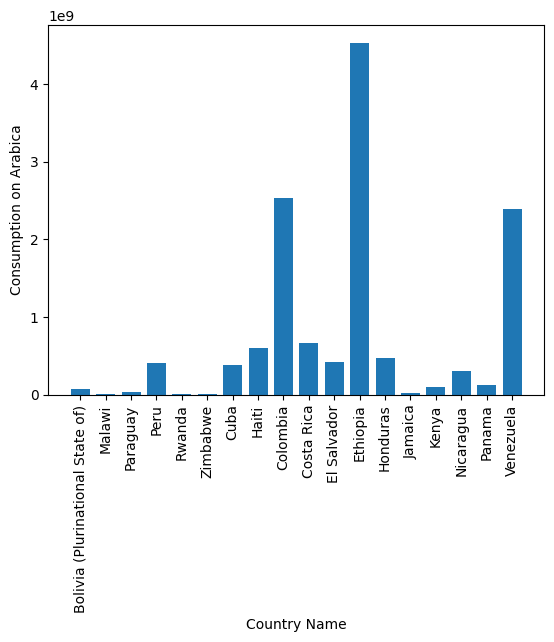

In [11]:
# TODO: Here, I want to visualize the amount of consumption by each country on the two kinds of coffee.
import matplotlib.pyplot as plt
plt.bar(Arabica_country,Arabica_consumption,width = 0.75)
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Consumption on Arabica')
plt.show()
#add name

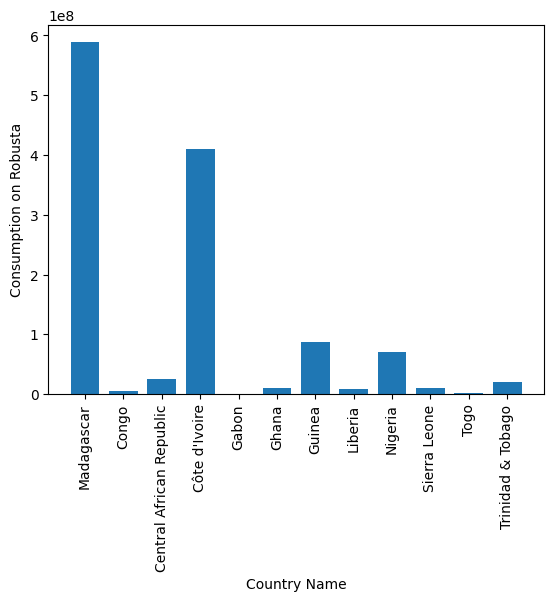

In [13]:
import matplotlib.pyplot as plt
plt.bar(Robusta_country,Robusta_consumption,width = 0.75)
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Consumption on Robusta')
plt.show()

In [7]:
#Here, I want to answer my question 2. I want to show what is Arabica consumption trend in three countries that we are interested: 
#Peru,Colombia and Costa Rica
with open('../data/raw/Coffee_domestic_consumption.csv', 'r') as f: 
    reader = csv.reader(f)
    for line in reader:
        if line[0] == 'Peru':
            peru = line[2:-2]
        elif line[0] == 'Colombia':
            Colombia = line[2:-2]
        elif line[0] =='Costa Rica':
            Costa_Rica = line[2:-2]
        elif line[0] == 'Country':
            years= line[2:-2]
        
        else:
            continue 


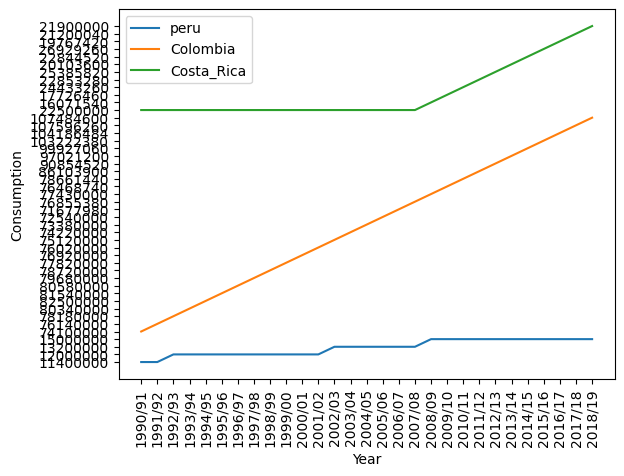

In [8]:
plt.plot(years,peru, label = 'peru')
plt.plot(years,Colombia, label = 'Colombia')
plt.plot(years,Costa_Rica, label = 'Costa_Rica')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend()
plt.show()



## Part 6 - Conclusion

TODO: write your conclusion here (interpret results of calculations; does it help answer your original questions?)
Yes, the process helped me understand my initial question. I found out that Ethiopia consumpted the most Arabica coffee while Madagarscarconsumpted the most Robusta coffee. I also used the visualization to show the Arabica consumption trend in Peru,Colombia and Costa Rica.

## Part 7 - Heights and Weights



The correlation between height and weight is 0.4959777555058912


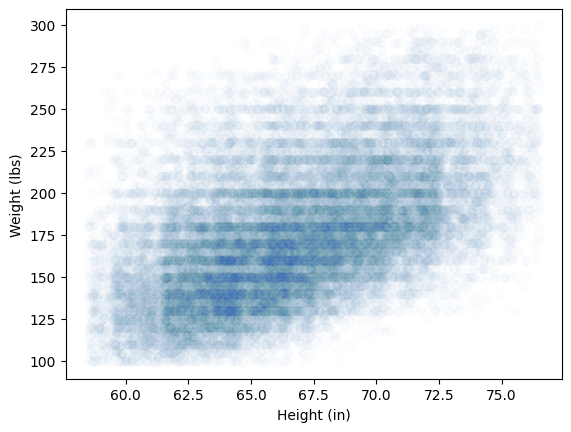

In [5]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('../data/raw/adult19.csv', 'r') as f:
    next(f)
    data = csv.reader(f)
    
    height = []
    weight = []
    for line in data:
        if int(line[49]) < 996 and int(line[50]) < 96:
            weight.append(int(line[49]))
            height.append(int(line[50]))
    
    height = np.array(height)
    weight = np.array(weight)
    corr = np.corrcoef(height, weight)
    print("The correlation between height and weight is", corr[0][1])
    jitter = 0.5
    height = [h + random.uniform(-jitter, jitter) for h in height]
    weight = [w + random.uniform(-jitter, jitter) for w in weight]
    plt.scatter(height, weight, alpha = 0.01)
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")
    plt.show()